# INM363 Deep Active Learning Network for Medical Image Segmentation

## Initial + Preprocessed Data Exploration

### Aaron Mir (Student Number: 160001207)

### https://github.com/Assassinsarms/Deep-Active-Learning-Network-for-Medical-Image-Segmentation

In [7]:
import os
from glob import glob
import sys
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from nibabel.testing import data_path

# importing packages for visualisation
import time
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
from sklearn.model_selection import train_test_split

## Initial Data Investigation

In [2]:
bratshgg_path = "data\\MICCAI_BraTS_2018_Data_Training\\HGG"
bratslgg_path = "data\\MICCAI_BraTS_2018_Data_Training\\LGG"

In [43]:
image_1_flair_gz = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_flair.nii.gz') 
image_1_t1_gz = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_t1.nii.gz') 
image_1_t1ce_gz = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_t1ce.nii.gz') 
image_1_t2_gz = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_t2.nii.gz') 
image_1_mask_gz = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_seg.nii.gz') 
# accessing the first volume and its modalities
image_1_flair = nib.load(image_1_flair_gz).get_fdata()    
image_1_t1 = nib.load(image_1_t1_gz).get_fdata()   
image_1_t1ce = nib.load(image_1_t1ce_gz).get_fdata()    
image_1_t2 = nib.load(image_1_t2_gz).get_fdata()   
image_1_mask = nib.load(image_1_mask_gz).get_fdata()   
# loading the first volume and its modalities
# transforming to np array  

In [25]:
image_1_flair.shape 
# looking at the shape (240x240 pixels), 155 frames

(240, 240, 155)

In [26]:
print(nib.load(image_1_flair_gz)) # looking at the header

<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine: 
[[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b   

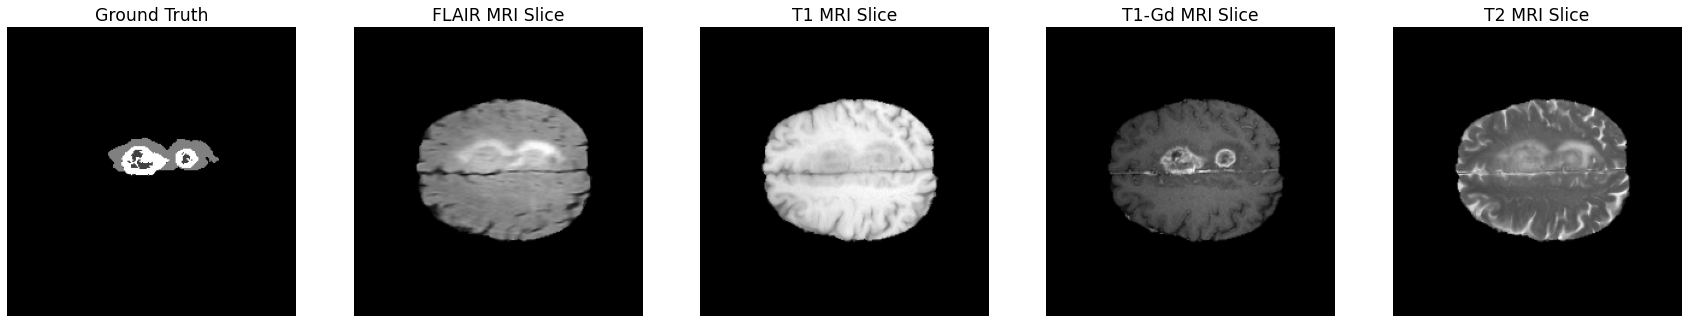

In [80]:
fig, axs = plt.subplots(1,5, figsize=(30,30))
axs[0].imshow(image_1_mask[:,:,108], cmap='gray')
axs[0].set_title("Ground Truth", size ='xx-large')
axs[0].axis("off")
axs[1].imshow(image_1_flair[:,:,108], cmap='gray')
axs[1].set_title("FLAIR MRI Slice", size ='xx-large')
axs[1].axis("off")
axs[2].imshow(image_1_t1[:,:,108], cmap='gray')
axs[2].set_title("T1 MRI Slice", size ='xx-large')
axs[2].axis("off")
axs[3].imshow(image_1_t1ce[:,:,108], cmap='gray')
axs[3].set_title("T1-Gd MRI Slice", size ='xx-large')
axs[3].axis("off")
axs[4].imshow(image_1_t2[:,:,108], cmap='gray')
axs[4].set_title("T2 MRI Slice", size ='xx-large')
axs[4].axis("off")
plt.show()

### Initial investigation of the label for the first training image

In [16]:
image_1_label = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_seg.nii.gz') 
# accessing the label for the first training image
image_1_label = nib.load(image_1_label) 
# loading the label for the first training image

In [17]:
image_1_label.shape 
# investigating the shape (240x240 pixels), 155 frames each frame represents the pixels where the tumour is present as demonstrated below 

(240, 240, 155)

In [18]:
print(image_1_label) 
# looking at the header for the label

<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine: 
[[ -1.  -0.  -0.  -0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b   

In [19]:
image_1_label_data = image_1_label.get_fdata() 
# transforming to np array - don't need to use np.asarray necessarily

In [20]:
image_1_label_data.shape 
# investigating the shape

(240, 240, 155)

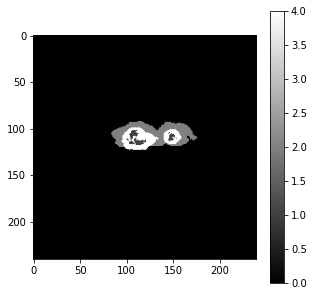

In [30]:
plt.figure(figsize=(5,5))
plt.imshow(image_1_label_data[:,:,108], cmap='gray') 
# plotting the label of the 1st training image - 108th frame shows clearly the tumour and pixels 0, 1, 2, 4 represents background, non-enhancing tumour, edema and enhancing tumour classes respectively
plt.colorbar();

## 3D MRI Visualisation

In [7]:
image_1 = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_flair.nii.gz') 
# accessing the first flair volume
image_1 = nib.load(image_1) 
# loading the flair volume
image_1_data = image_1.get_fdata() 
# converting to np array

In [8]:
height, width, depth = image_1_data.shape         
# getting the dimensions
print(f'This image has the following dimensions: \nHeight = {height}\nWidth = {width}\nDepth = {depth}')

This image has the following dimensions: 
Height = 240
Width = 240
Depth = 155


In [9]:
# Function enabling interaction of all MRI layers
def visualisation(layer):                 
    plt.figure(figsize=(5,5))
    channel = 0
    plt.imshow(image_1_data[:,:, layer], cmap='gray')
    plt.title('Visualisation of Layers of Brain MRI', family='Arial', fontsize=20)
    plt.axis('off')
    return layer

interact(visualisation, layer = (0, image_1_data.shape[2]-1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [3]:
## Doing the same as above for the labels
image_1_label = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_seg.nii.gz') 
# accessing the label for the first training image
image_1_label = nib.load(image_1_label) 
# loading the label for the first training image
image_1_label_data = image_1_label.get_fdata()

In [4]:
height, width, depth = image_1_label_data.shape         
# getting the dimensions
print(f'This image has the following dimensions: \nHeight = {height}\nWidth = {width}\nDepth = {depth}.')
print(f'With the unique values: {np.unique(image_1_label_data)}.')
print('''Corresponding to the label categories:             
 0: for background,
 1: for non-enhancing tumour,
 2: for edema
 4: for enhancing tumour''')                            
 # outlining the labels

This image has the following dimensions: 
Height = 240
Width = 240
Depth = 155.
With the unique values: [0. 1. 2. 4.].
Corresponding to the label categories:             
 0: for background,
 1: for non-enhancing tumour,
 2: for edema
 4: for enhancing tumour


In [5]:
classes = {
    'Background' : 0.,
    'Non-enhancing Tumour' : 1.,
    'Edema' : 2.,
    'Enhancing Tumour' : 4.,
}
select_class = ToggleButtons(
    options = ['Background','Non-enhancing Tumour', 'Edema', 'Enhancing Tumour'],
    description = 'Select Class:',
    disabled = False,
    button_style = 'info', 
    
)
select_layer = IntSlider(min=0, max=154, description='Select Layer', continuous_update=False)

def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    img_label = classes[seg_class]
    mask = np.where(image_1_label_data[:,:, layer] == img_label, 255, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis('off');
# interactive jupyter widget to show different class labels
interactive(plot_image, seg_class = select_class, layer = select_layer) 
# remember the white space represents the class that is being shown

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Background', '…

## Viewing Data after Preprocessing

### Summary of steps performed:
- N4ITK bias correction 
- Normalise to zero mean and unit variance
- 1% of the top and bottom intensities removed 

In [68]:
image_original = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_t2.nii.gz') 
image_original = nib.load(image_original) 
image_original = image_original.get_fdata() 
img_preprocessed = np.load('data\\all_data\\img\\Brats18_2013_2_1_108.npy')

In [13]:
img_preprocessed.shape
# one .npy file contains 4 slices of flair, t1, t1-gd and t2

(160, 160, 4)

(-0.5, 159.5, 159.5, -0.5)

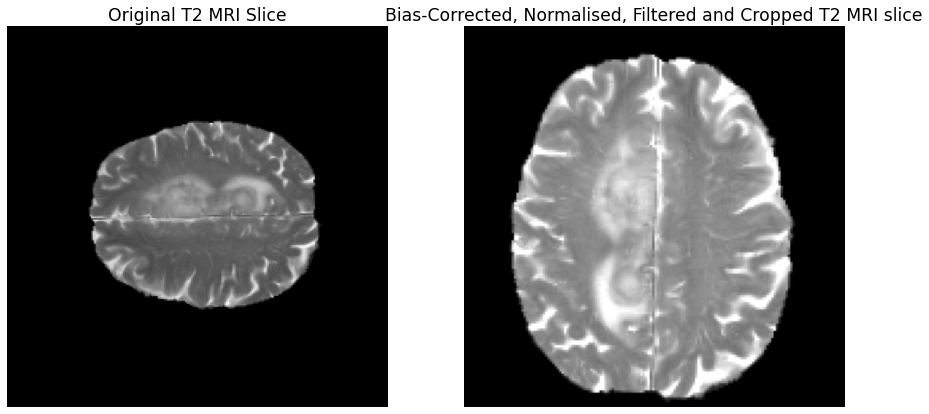

In [94]:
img_preprocessed = np.load('data\\all_data\\img\\Brats18_2013_2_1_108.npy')
t = np.percentile(img_preprocessed, 45)
b = np.percentile(img_preprocessed, 100)
img_preprocessed = np.clip(img_preprocessed, t, b)
fig, axs = plt.subplots(1,2, figsize=(15,15))
axs[0].imshow(image_original[:,:,108], cmap='gray')
axs[0].set_title("Original T2 MRI Slice", size ='xx-large')
axs[0].axis("off")
axs[1].imshow(img_preprocessed[:,:,3], cmap='gray')
axs[1].set_title("Bias-Corrected, Normalised, Filtered and Cropped T2 MRI slice", size ='xx-large')
axs[1].axis("off")